# Analysis of Wisconsin Diagnostic Breast Cancer Dataset

## Import libraries

Let's start with importing general libraries that will be used throughout this notebook. As and when other specific libraries are needed, we will import them as well.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *
import time

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
%matplotlib inline

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data load and preliminary analysis

Let's load the Wisconsin Diagnostic Breast Cancer Dataset. The raw format of this dataset is CSV file, therefore we will create a DataFrame out of it using imported Pandas library. 
<br>Since the headers are missing, we need to add them manually using provided description document (https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names)

In [2]:
attrs = ['ID', 'diagnosis']
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 
            'concavity', 'concave_points', 'symmetry', 'fractal_dimension']
column_names = attrs + features + [feature + '_se' for feature in features] + [feature + '_worst' for feature in features]

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

df = pd.read_csv(url, header=None, names=column_names)
print('WDBC dataset shape:', df.shape)

WDBC dataset shape: (569, 32)


Let's look at the first five entries:

In [4]:
df.head()

,ID,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The "ID" column is unique ID number of every entry.
<br>The "diagnosis" column is the target value, which classifies every entry into Benign (B) or Malignant (M) categories. 
<br>All other remaining columns are float valued features.

Let's check if there are no collisions in IDs

In [5]:
if len(df['ID']) == len(df['ID'].unique()):
    print('IDs are unique')

IDs are unique


Let's compare numbers of diagnosis classes

Number of Benign: 357 (62.74%)
Number of Malignant: 212 (37.26%)


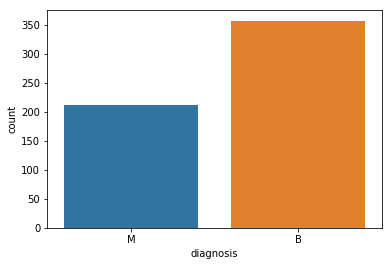

In [6]:
ax = sns.countplot(df['diagnosis'], label="Count")
B, M = df['diagnosis'].value_counts()
print('Number of Benign: {} ({}%)'.format(B, np.round(100*B/(B+M), 2)))
print('Number of Malignant: {} ({}%)'.format(M, np.round(100*M/(B+M), 2)))

Let's check if there are any missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                         569 non-null int64
diagnosis                  569 non-null object
radius                     569 non-null float64
texture                    569 non-null float64
perimeter                  569 non-null float64
area                       569 non-null float64
smoothness                 569 non-null float64
compactness                569 non-null float64
concavity                  569 non-null float64
concave_points             569 non-null float64
symmetry                   569 non-null float64
fractal_dimension          569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

As we may observe there are no missing values, which is good.

Let's now proceed to the tasks:

## Task a - Mean, median and standard deviation of the "perimeter" feature

The mean, median and standard deviation can easily be computed using the `describe()` method provided by the Pandas library. <br>Mean is stated as __'mean'__, median as __'50%'__ (i.e. the 50th percentile), and standard deviation as __'std'__

In [8]:
df['perimeter'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter, dtype: float64

## Task b - Distribution of  the "radius" feature

At this task we need to answer whether the "radius" feature comes from a normal distribution or not.
<br>There are a number of methods to test it. We will start from visualization methods, which are very useful and can provide some insights about the normality or non-normality of our data

### Visualization methods

__Histogram__ is a very useful graphical representation of the data. Let's plot two histograms on one graph: one for the given sample ("radius") and another one for sample generated from a normal distribution with the same mean and standard deviation. It will give us an intuition about the data distribution

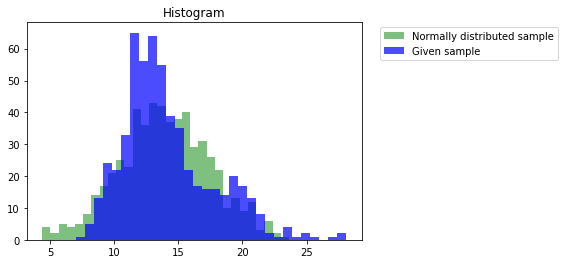

In [9]:
radius_sample = df['radius']
radius_mean = radius_sample.mean()
radius_std = radius_sample.std()
norm_sample = norm.rvs(loc=radius_mean, scale=radius_std, size=len(radius_sample), random_state=0)
plt.hist(norm_sample, color='g', alpha = 0.5, label='Normally distributed sample', bins=30)
plt.hist(radius_sample, color='b', alpha = 0.7, label='Given sample', bins=30)
plt.legend(bbox_to_anchor=(1.6, 1))
plt.title('Histogram')
plt.show()

We may observe a visible mismatch between two histograms: the given sample (which is in blue) is skewed to the left with the tail extending to the right, while a normally distributed sample (in green) is more symmetric.

We can actually measure how much the given sample is skewed using the `stats.skew()` method provided by SciPy library. __Skewness__ involves the symmetry of distribution, and for normally distributed samples, the skewness should be about 0.

In [10]:
print('Skewness of normally distrbuted sample = {}'.format(skew(norm_sample, bias=False)))
print('Skewness of given sample = {}'.format(skew(radius_sample, bias=False)))

Skewness of normally distrbuted sample = -0.01665138400226374
Skewness of given sample = 0.9423795716730993


As expected, Skewness of the given sample is a relatively large positive number compared to the normally distributed sample (which is much closer to 0)

Let's look at another good visualization method - __Q-Q plot (quantile-quantile plot)__, which determines whether two different samples (provided sample and normally distributed sample)  come from a population with common distributions.

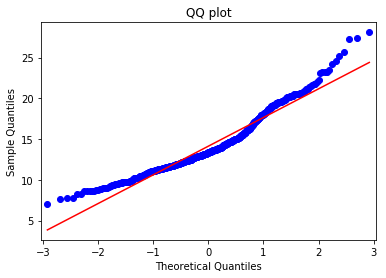

In [11]:
sm.qqplot(radius_sample, loc=radius_mean, scale=radius_std, line='s')
plt.title('QQ plot')
plt.show()

The red line indicates the values to which our sample should correspond if the distribution was normal. The blue dots represent the given sample.
<br>From the plot above we may clearly see that the blue dots significantly deviates from red line. This together with the observations from Histogram and positive Skewness value indicate that the given sample is not from a normal distribution.

These plots should not be used alone to detect normality, but instead, to look for symmetry, skewness, deviations to give some insights of the given sample distribution and its normality/non-normality.

### Formal Normality tests

Let's conduct more objective and most popular tests of normality:
* Shapiro-Wilk test
* Kolmogorov-Smirnov test

which are well provided in the SciPy library by methods `stats.shapiro()` and `stats.kstest()` respectively:

In [12]:
sw_test = shapiro(radius_sample)
ks_test = kstest(radius_sample, 'norm', args=(radius_mean, radius_std))
print('Shapiro-Wilk test:', sw_test)
print('  Test statistic = {}'.format(sw_test[0]))
print('  P-value = {}'.format(sw_test[1]))
print('\nKolmogorov-Smirnov test:', ks_test)
print('  Test statistic = {}'.format(ks_test[0]))
print('  P-value = {}'.format(ks_test[1]))

Shapiro-Wilk test: (0.9410696029663086, 3.1061551985026026e-14)
  Test statistic = 0.9410696029663086
  P-value = 3.1061551985026026e-14

Kolmogorov-Smirnov test: KstestResult(statistic=0.11270761105207511, pvalue=9.434722179069155e-07)
  Test statistic = 0.11270761105207511
  P-value = 9.434722179069155e-07


The Shapiro-Wilk (S-W) and the Kolmogorov–Smirnov (K-S) tests are designed to test normality by comparing the given sample to a normal distribution with the same mean and standard deviation of the given sample (to be more precise, K-S test is not necessarily just for comparing against normal distributions, but we will use it in our case). 
<br>The null hypothesis of the tests is the sample is normally distributed. If the returned P-value is greater than 0.05 then the null hypothesis can be accepted, otherwise it should be rejected. 
<br>In our case both tests returned P-values that much less than 0.05, i.e. the null hypothesis is rejected and there is evidence that the data is NOT from a normal distribution.

What would be more appopriate distribution for "radius" feature then? We have observed that it is skewed to the left with the tail extending to the right. Actually, there are many skewed distributions that we could choose from, for instance, let's compare it with Gamma distribution.

The probability density function (pdf) of the Gamma distribution is characterized by alpha and beta parameters, where alpha and beta can be calulated by the following formulas:
$$\alpha = E(X)^2/Var(X)$$
$$\beta = Var(X)/E(X)$$

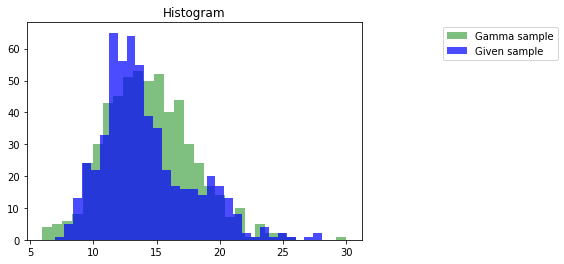

KstestResult(statistic=0.07960055974911684, pvalue=0.0013905881634523887)


In [13]:
alpha, beta = radius_mean**2/radius_std**2, radius_std**2/radius_mean
gamma_sample = gamma.rvs(a=alpha, scale=beta, size=len(radius_sample))
plt.hist(gamma_sample, color='g', alpha = 0.5, label='Gamma sample', bins=30, density=False)
plt.hist(radius_sample, color='b', alpha = 0.7, label='Given sample', bins=30,density=False)
plt.legend(bbox_to_anchor=(1.6, 1))
plt.title('Histogram')
plt.show()
print(kstest(radius_sample, 'gamma', args=(alpha, 0, beta)))

We may see that Gamma distribution looks more appropriate distribution for the "radius" feature compared to normal distribution. Though P-value is smaller than 0.05 and null hypothesis should be rejected. We can compare other distributions and test them against the "radius" feature distribution to find a better match, but let us approach this task in another way.

### Benign and Malignant "radius" feature

Let's observe the "radius" feature for two given diagnosis classes __separately__. For this we need to define the corresponding samples

In [14]:
benign_sample = df[df['diagnosis'] == 'B']['radius']
malignant_sample = df[df['diagnosis'] == 'M']['radius']

Let's now look at the overall histogram with separated Benign and Malignant samples

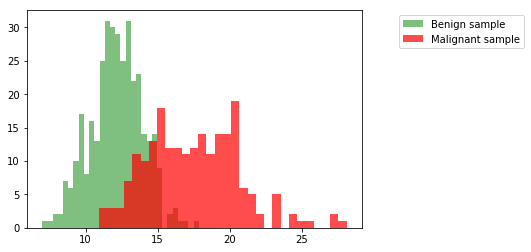

In [15]:
plt.hist(benign_sample, color='g', alpha = 0.5, label='Benign sample', bins=30)
plt.hist(malignant_sample, color='r', alpha = 0.7, label='Malignant sample', bins=30)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

It looks like the Benign sample is closer to normal distribution, while the Malignant sample is still looks like non-normal.
<br>We may apply the same methods we did above to test normality for these two samples. To simplify this process, let's define a helper function

In [16]:
def test_normality(sample):
    print('Skewness: {}'.format(skew(sample)))
    sm.qqplot(sample, loc=sample.mean(), scale=sample.std(), line='s')
    plt.title('QQ plot')
    plt.show()
    sw_test = shapiro(sample)
    ks_test = kstest(sample, 'norm', args=(sample.mean(), sample.std()))
    print('\nShapiro-Wilk test:', sw_test)
    print('  Test statistic = {}'.format(sw_test[0]))
    print('  P-value = {}'.format(sw_test[1]))
    print('\nKolmogorov-Smirnov test:', ks_test)
    print('  Test statistic = {}'.format(ks_test[0]))
    print('  P-value = {}'.format(ks_test[1]))

__Test for Benign sample__

Skewness: -0.08344660198964896


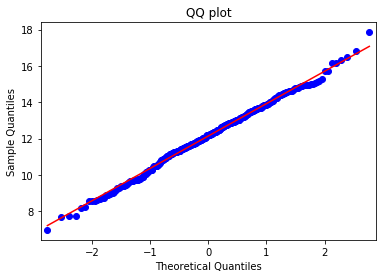


Shapiro-Wilk test: (0.9966529011726379, 0.6679348349571228)
  Test statistic = 0.9966529011726379
  P-value = 0.6679348349571228

Kolmogorov-Smirnov test: KstestResult(statistic=0.03278944176799026, pvalue=0.8374037398377918)
  Test statistic = 0.03278944176799026
  P-value = 0.8374037398377918


In [17]:
test_normality(benign_sample)

We may see very small skewness value, and Q-Q plot now clearly shows that the blue dots lie almost perfectly on the red line. Moreover both S-W and K-S tests return a P-value much greater than 0.05. This all indicates a normality (normal distribution) of the Benign sample.

__Test for Malignant sample__

Skewness: 0.4983438269401485


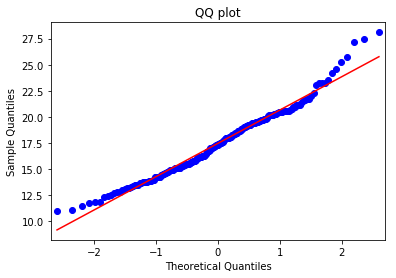


Shapiro-Wilk test: (0.9776597619056702, 0.0018945835763588548)
  Test statistic = 0.9776597619056702
  P-value = 0.0018945835763588548

Kolmogorov-Smirnov test: KstestResult(statistic=0.060258631595355494, pvalue=0.4121931125386584)
  Test statistic = 0.060258631595355494
  P-value = 0.4121931125386584


In [18]:
test_normality(malignant_sample)

In case of Malignant sample we may observe that the skewness value is relatively big and S-W test returns P-value which is __less__ than 0.05, meaning the null hypothesis should be rejected. But at the same time K-S test returns P-value which is much __greater__ than 0.05 that pushes us to accept the null hypothesis.
<br>It is a completely possible situation, because failure to reject the null hypotheses could come from the sample size being too small to detect the non-normality, and vice-versa. As in our case the sample size is just 212.

## Task c - Train and compare the results of two classifiers

At this task we will train and optimize some binary classifiers and compare their results. 
<br>But first we will do some data visualizations, this will allow us to get the insights into data, a general picture, intercorrelations and so on.

### Data preparation and Visualizations

Let's first divide our data into features `X` and target `y`

In [19]:
X = df.drop(attrs, axis=1)
y = df['diagnosis']

In [20]:
X.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Principal Component Analysis (PCA)

Now, it would be interesting to look at how our entries look like in the whole feature space. Since our feature space is 30 dimensional, we are going to use dimensionality reduction technique, so-called Principal Component Analysis (PCA), which is using the correlation between some dimensions and tries to provide a minimum number (or given number) of variables that keeps the maximum amount of variation or information about how the original data is distributed.

PCA is effected by scale, which is why we will use `StandardScaler()` method provided by Scikit-Learn library, to scale our feature space (mean=0, variance=1).

In [21]:
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

Now we are going to project the original scaled data which is 30 dimensional into 2 dimensions using Scikit-Learn implementation of PCA. It's worth noting that there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation. And we will use these components for training our classifier later.

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_standardized)
principalDf = pd.DataFrame(data=np.hstack((principalComponents, y.values.reshape(-1,1))), 
                           columns=['Principal component 1', 'Principal component 2', 'diagnosis'])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


Now, given that the first two principal components account for approx. 63% of the variation in the entire dataset, let's see if that is sufficient to visually set the diagnosis classes apart. For this purpose, we will create a scatterplot of the first and second principal component and color Benign and Malignant entries with different colors

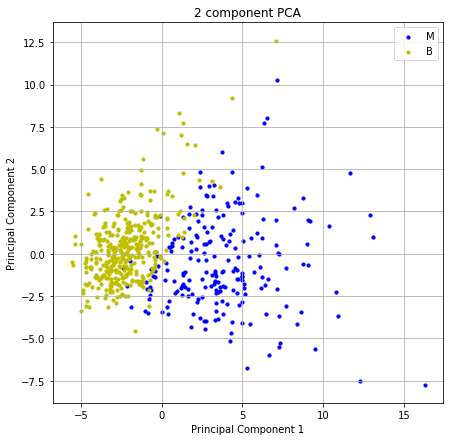

In [23]:
fig, ax = plt.subplots(figsize = (7,7))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
targets = ['M', 'B']
colors = ['b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['diagnosis'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'Principal component 1'], 
               principalDf.loc[indicesToKeep, 'Principal component 2'], 
               c = color, s = 10)
ax.legend(targets)
ax.grid()

As we may notice on the graph above the diagnosis classes seem well separated from each other.

#### Intercorrelation

Now let’s investigate the correlation between the features using `corr()` method for Pearson correlation.

In [24]:
target_dict = {'B': 0, 'M': 1}
target_dict_inv = {v: k for k,v in target_dict.items()}
y = y.apply(lambda x: target_dict[x])

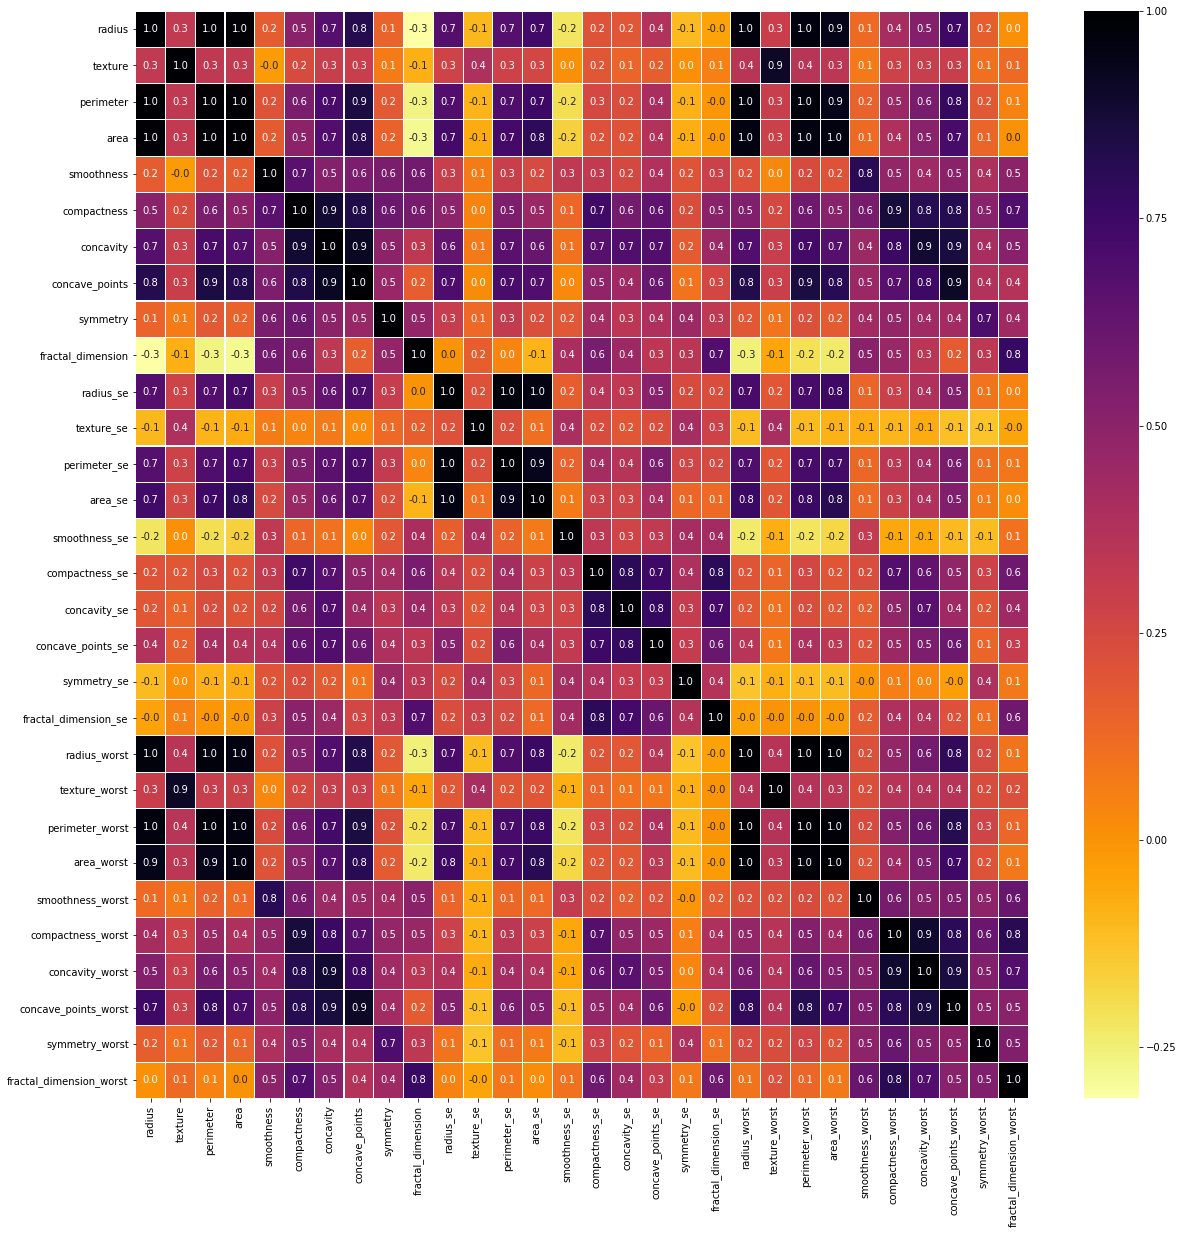

In [25]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.1, ax=ax, fmt= '.1f', cmap="inferno_r")
plt.show()

From the above heatmap we may observe the highest correlations (0.9 or 1.0) between:
1. radius and perimeter, area, radius_worst, perimeter_worst
2. texture and texture_worst
3. compactness and concavity, compactness_worst
4. concave_points and perimeter, concavity, concave_points_worst
5. radius_se and perimeter_se, area_se
6. area_worst and area, radius_worst, perimeter_worst

Let's now take a closer look at some feature pairs. We will use `pairplot()` from Seaborn library.

In [26]:
def pair_plots(features_list, target):
    sns.pairplot(df, hue=target, markers=["s", "o"], vars=features_list)
    plt.show()

First, features that are correlated, for example

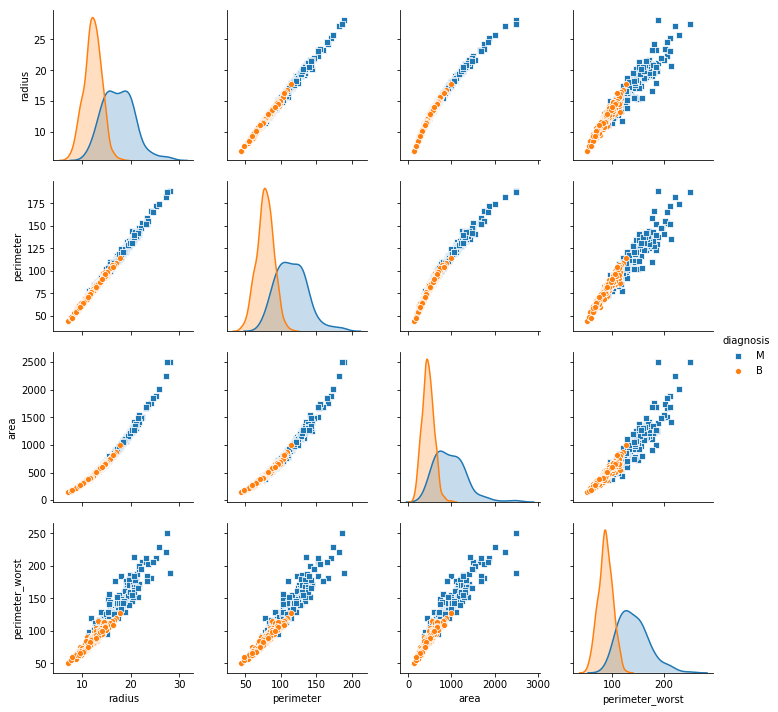

In [27]:
pair_plots(['radius', 'perimeter', 'area', 'perimeter_worst'], 'diagnosis')

We may observe that some of the correlated pairs are showing as well an approximately linear separation between Benign and Malignant entries.
We also may notice a strong correlation between radius and perimeter, which can be obviously explained by their nature.

Features pairs with low correlation, for example

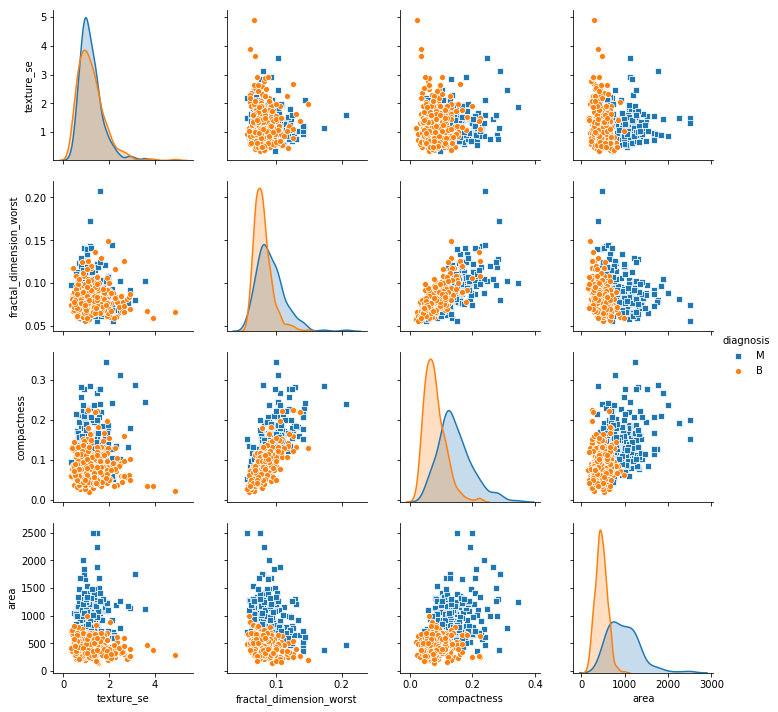

In [28]:
pair_plots(['texture_se', 'fractal_dimension_worst', 'compactness', 'area'], 'diagnosis')

Here we can observe low correlated features that have a considerable overlap for the two Benign and Malignant entries (e.g. fractal_dimension_worst and texture_se) as well as low correlated features that have a good selectivity for M and B (e.g. compactness and area)

### Training and optimizing classifiers

Let's now train our classifiers! We are going to train our classifiers on three different feature sets (1) 2 PCA components (2) n PCA components (3) all features

At the (2) we will use PCA to select components with a total explained variation greater than a predefined threshold - 0.9 (it's rather an arbitrary value).
<br> And we are going to use the following predefined classifiers from Scikit-Learn library: `LogisticRegression`, `LinearSVC`, `RandomForestClassifier`

But before we need to split the entire dataset into train and test sets. Train set will be used for training and optimizing the classifier, and test set for a final evaluation of the classifer. It can be easily done with provided by Scikit-Learn method `train_test_split()`. We will also fix a random_state for reproducibility.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print("Number of train samples = {}".format(X_train.shape[0]))
print("Number of test samples = {}".format(X_test.shape[0]))

Number of train samples = 398
Number of test samples = 171


Every classifier has the so-called hyperparameters, which are not learnt during the training process and should be tuned in advance (for example, C (regularization parameter) for logistic regression, etc.).
<br>But actually, these hyperparameters can be well optimized. For example, we will use `RandomizedSearchCV()` to optimize hyperparameters and _cross-validation_ to estimate the generalization performance. And hopefully, we will receive a highly optimized and accurate classifiers, which then can be compared

Let's now start from defining the __baseline model__.
<br>Our dataset contains 357 entries of Benign and 212 entries of Malignant. Baseline model classifies every entry as Benign => ~63% accuracy.

Hopefully our further classifiers will outperform the baseline model

#### (1) 2 PCA components

_Logistic Regression_

Let's import `LogisticRegression()`, `RandomizedSearchCV()` and `Pipeline()` methods and some metrics, which we will use to evaluate the classifier

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

Let's now create some helper functions

In [31]:
def get_best_clf(clf, params_dict, X_train, y_train):
    t0=time.time()
    best_clf = clf.fit(X_train, y_train)
    for param in params_dict.keys():
        print('Best {}: {}'.format(param.split('__')[-1], best_clf.best_estimator_.get_params()[param]))
    t1 = time.time()
    print('Trained in {} s'.format(np.round(t1-t0, 2)))
    return best_clf

In [32]:
def evaluate(clf, X_test, y_test):
    t0 = time.time()
    predictions = clf.predict(X_test)
    t1 = time.time()
    print('Predicted in {} ms'.format(np.round((t1-t0)*1000,2)))
    acc = accuracy_score(y_test, predictions)
    print('Accuracy is: {}'.format(acc))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")
    plt.show()
    print(classification_report(y_test, predictions))
    return t1-t0, acc

Finally, let's train logistic regression on 2 PCA components out of all features

In [33]:
pipeline_logit = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf_logit', LogisticRegression(random_state=124))
])

params_dict_logit = {
    'clf_logit__penalty': ['l1', 'l2'],
    'clf_logit__C': uniform(0, 100)
}
clf_logit_cv = RandomizedSearchCV(pipeline_logit, params_dict_logit, random_state=1, n_iter=50, cv=5, verbose=0, n_jobs=-1)

In [34]:
best_clf_logit = get_best_clf(clf_logit_cv, params_dict_logit, X_train, y_train)

Best penalty: l1
Best C: 41.7022004702574
Trained in 1.85 s


Predicted in 1.0 ms
Accuracy is: 0.9415204678362573


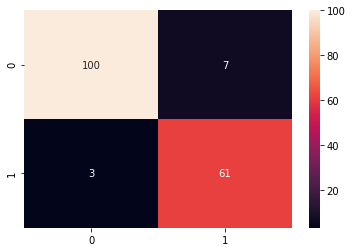

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.90      0.95      0.92        64

   micro avg       0.94      0.94      0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [35]:
logit_pca_time, logit_pca_acc = evaluate(best_clf_logit, X_test, y_test)

Accuracy is 94%! It's a lot better than the baseline classifier (accuracy of which was ~63%).

We can now plot the decision boundary of this classifier against the data to see how it looks like. The desicion boundary in a logistic regression is when $w_0  + w_1x_1 + w_2x_2 = 0$

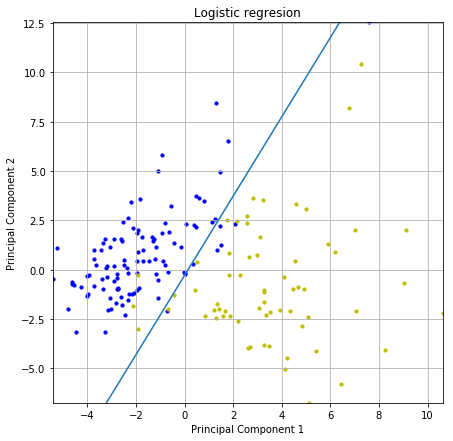

In [36]:
fig, ax = plt.subplots(figsize = (7,7))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Logistic regresion')
targets = [0, 1]
colors = ['b', 'y']
w0 = best_clf_logit.best_estimator_.named_steps['clf_logit'].intercept_
w1, w2 = best_clf_logit.best_estimator_.named_steps['clf_logit'].coef_[0]
X1 = Pipeline(best_clf_logit.best_estimator_.steps[:-1]).transform(X_test)[:, 0]
X2 = Pipeline(best_clf_logit.best_estimator_.steps[:-1]).transform(X_test)[:, 1]
for target, color in zip(targets,colors):
    indicesToKeep = y_test == target
    ax.scatter(X1[indicesToKeep], 
               X2[indicesToKeep], 
               c = color, s = 10)
ax.plot(np.linspace(X1.min(), X1.max(), 100), -(w1 * np.linspace(X1.min(), X1.max(), 100) + w0) / w2)
ax.axis([X1.min(), X1.max(), X2.min(), X2.max()])
ax.grid()

Great! Looks like a reasonable way to split the data.

_Linear SVM_

Let's now train Linear SVM, which is also known as large margin classifier, i.e. it tries to find the widest possible separating margin.
<br>We will create the same pipeline: `StandardScaler()` + `PCA()` transformation, but this time we will use `LinearSVC()` classifier

In [37]:
from sklearn.svm import LinearSVC

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf_svm', LinearSVC(random_state=124))
])

params_dict_svm = {
    'clf_svm__C': uniform(scale=1/10)
}

clf_svm_cv = RandomizedSearchCV(pipeline_svm, params_dict_svm, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [38]:
best_clf_svm = get_best_clf(clf_svm_cv, params_dict_svm, X_train, y_train)

Best C: 0.07203244934421581
Trained in 1.14 s


Predicted in 1.0 ms
Accuracy is: 0.9415204678362573


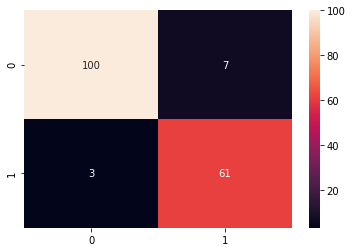

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.90      0.95      0.92        64

   micro avg       0.94      0.94      0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [39]:
svm_pca_time, svm_pca_acc = evaluate(best_clf_svm, X_test, y_test)

We received an absolutely the same result as with Logistic regression. Let's plot both decision boundaries on one graph and take a look

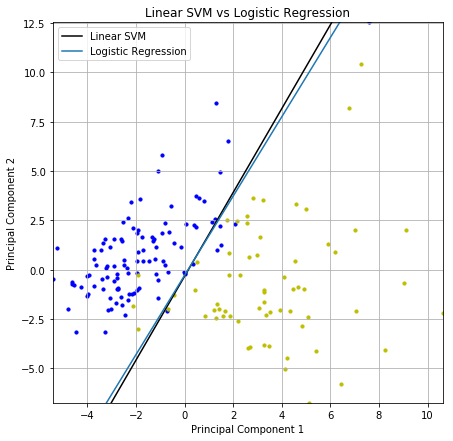

In [40]:
fig, ax = plt.subplots(figsize = (7,7))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Linear SVM vs Logistic Regression')
targets = [0, 1]
colors = ['b', 'y']
w0 = best_clf_svm.best_estimator_.named_steps['clf_svm'].intercept_
w1, w2 = best_clf_svm.best_estimator_.named_steps['clf_svm'].coef_[0]
X1 = Pipeline(best_clf_svm.best_estimator_.steps[:-1]).transform(X_test)[:, 0]
X2 = Pipeline(best_clf_svm.best_estimator_.steps[:-1]).transform(X_test)[:, 1]

w0_logit = best_clf_logit.best_estimator_.named_steps['clf_logit'].intercept_
w1_logit, w2_logit = best_clf_logit.best_estimator_.named_steps['clf_logit'].coef_[0]
for target, color in zip(targets,colors):
    indicesToKeep = y_test == target
    ax.scatter(X1[indicesToKeep], 
               X2[indicesToKeep], 
               c = color, s = 10)
ax.plot(np.linspace(X1.min(), X1.max(), 100), -(w1 * np.linspace(X1.min(), X1.max(), 100) + w0) / w2, 'k-')
ax.plot(np.linspace(X1.min(), X1.max(), 100), -(w1_logit * np.linspace(X1.min(), X1.max(), 100) + w0_logit) / w2_logit)
ax.axis([X1.min(), X1.max(), X2.min(), X2.max()])
ax.legend(['Linear SVM', 'Logistic Regression'])
ax.grid()

There is an only slight deviation between the boundaries. 
<br> This means that our logistic regression is well optimized/regularized and works comparable to optimized linear SVM

_Random Forest Classifier_

Let's now try some non-linear classifier, for example `RandomForestClassifier()`

In [41]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf_rf', RandomForestClassifier(random_state=124))
])

params_dict_rf = {
    "clf_rf__n_estimators": [x for x in range(100, 2000, 100)],
    "clf_rf__criterion": ["gini", "entropy"],
    "clf_rf__max_depth": [x for x in range(10, 100, 10)] + [None],
    "clf_rf__max_features": ['auto', 'sqrt'],
    "clf_rf__min_samples_split": randint(2, 11),
    "clf_rf__min_samples_leaf": randint(1,4),
    "clf_rf__bootstrap": [True, False]
}

clf_rf_cv = RandomizedSearchCV(pipeline_rf, params_dict_rf, random_state=1, n_iter=200, cv=5, verbose=2, n_jobs=-1)

In [42]:
best_clf_rf = get_best_clf(clf_rf_cv, params_dict_rf, X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.1min finished


Best n_estimators: 800
Best criterion: entropy
Best max_depth: 20
Best max_features: sqrt
Best min_samples_split: 10
Best min_samples_leaf: 2
Best bootstrap: False
Trained in 368.37 s


Predicted in 62.83 ms
Accuracy is: 0.9005847953216374


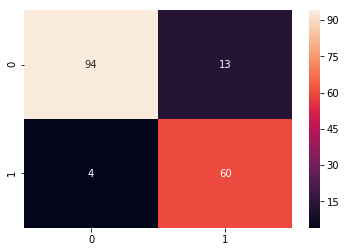

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       107
           1       0.82      0.94      0.88        64

   micro avg       0.90      0.90      0.90       171
   macro avg       0.89      0.91      0.90       171
weighted avg       0.91      0.90      0.90       171



In [43]:
rf_pca_time, rf_pca_acc = evaluate(best_clf_rf, X_test, y_test)

Accuracy is 90% - nice result. It's quite higher than the baseline model, but less accurate than previously generated Logistic Regression and Linear SVM. This is most likely due to low-dimensional dataset (2 features), and data is approximately linearly separable, which is why linear classifiers do better.

Let's move on to n PCA components

#### (2) n PCA components

_Logistic Regression_

We need to define a threshold `T` to indicate the amount of variance that needs to be explained by PCA components

In [44]:
T = 0.9

To train logistic regression on _n PCA components_, we take absolutely the same steps, the only change is `n_components` (parameter of `PCA()`) is now equal to threshold `T`

Best penalty: l2
Best C: 30.233257263183976
Trained in 0.71 s
Predicted in 0.0 ms
Accuracy is: 0.9181286549707602


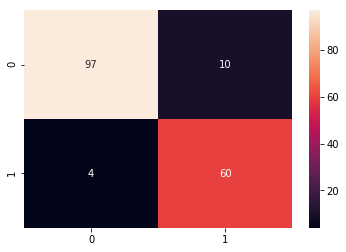

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       107
           1       0.86      0.94      0.90        64

   micro avg       0.92      0.92      0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



In [45]:
pipeline_logit = Pipeline([
    ('scaler', StandardScaler()),
    ('pca_n', PCA(T)),
    ('clf_logit', LogisticRegression(random_state=124))
])
clf_logit_cv = RandomizedSearchCV(pipeline_logit, params_dict_logit, random_state=1, n_iter=50, cv=5, verbose=0, n_jobs=-1)
best_clf_logit = get_best_clf(clf_logit_cv, params_dict_logit, X_train, y_train)
logit_imp_time, logit_imp_acc = evaluate(best_clf_logit, X_test, y_test)

The accuracy is 91.8%, which is lower than our current best classifier. And it is a bit worse than results of Logistic Regression with `PCA(n_components=2)`. Most probably due to overfitting, because this time we fit more features

_Linear SVM_

The same for linear SVM:

Best C: 0.023702698024302773
Trained in 1.02 s
Predicted in 1.0 ms
Accuracy is: 0.9473684210526315


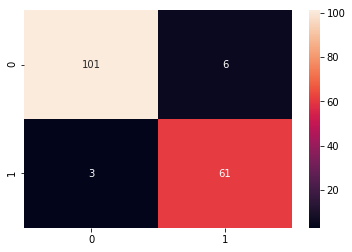

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.91      0.95      0.93        64

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [47]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('pca_n', PCA(T)),
    ('clf_svm', LinearSVC(random_state=124))
])
clf_svm_cv = RandomizedSearchCV(pipeline_svm, params_dict_svm, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_clf_svm = get_best_clf(clf_svm_cv, params_dict_svm, X_train, y_train)
svm_imp_time, svm_imp_acc = evaluate(best_clf_svm, X_test, y_test)

It's our new best model! Accuracy is 94.74%. Linear SVM  with `PCA(n_components = 0.9)` does better than Logistic Regression with `PCA(n_components = 0.9)`. This may be due to the fact that Logistic Regression is more sensitive to outliers than Linear SVM, and therefore less generalized

_Random Forest Classifier_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.8min finished


Best n_estimators: 800
Best criterion: entropy
Best max_depth: 90
Best max_features: sqrt
Best min_samples_split: 4
Best min_samples_leaf: 1
Best bootstrap: True
Trained in 411.36 s
Predicted in 55.85 ms
Accuracy is: 0.9005847953216374


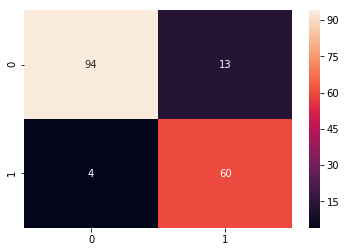

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       107
           1       0.82      0.94      0.88        64

   micro avg       0.90      0.90      0.90       171
   macro avg       0.89      0.91      0.90       171
weighted avg       0.91      0.90      0.90       171



In [48]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(T)),
    ('clf_rf', RandomForestClassifier(random_state=124))
])

clf_rf_cv = RandomizedSearchCV(pipeline_rf, params_dict_rf, random_state=1, n_iter=200, cv=5, verbose=2, n_jobs=-1)
best_clf_rf = get_best_clf(clf_rf_cv, params_dict_rf, X_train, y_train)
rf_imp_time, rf_imp_acc = evaluate(best_clf_rf, X_test, y_test)

Random Forest still shows lower results compared to Linear SVM and Logistic Regression. It still may happen due to the fact that the data is approximately linearly separable, which is why linear classifiers do better.

#### (3) All features

Let's now train our classifier on all features, without PCA dimensionality reduction

_Logistic Regression_

Best penalty: l2
Best C: 3.905478323288236
Trained in 0.82 s
Predicted in 1.0 ms
Accuracy is: 0.9473684210526315


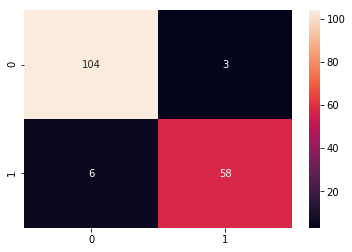

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [49]:
pipeline_logit = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_logit', LogisticRegression(random_state=124))
])

clf_logit_cv = RandomizedSearchCV(pipeline_logit, params_dict_logit, random_state=1, n_iter=50, cv=5, verbose=0, n_jobs=-1)
best_clf_logit = get_best_clf(clf_logit_cv, params_dict_logit, X_train, y_train)
logit_imp_time, logit_imp_acc = evaluate(best_clf_logit, X_test, y_test)

The result is comparable with previous Logistic Regressions with `PCA()`

_Linear SVM_

Best C: 0.08781174363909455
Trained in 0.74 s
Predicted in 0.0 ms
Accuracy is: 0.9649122807017544


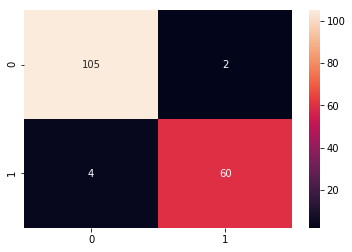

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.97      0.94      0.95        64

   micro avg       0.96      0.96      0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [50]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_svm', LinearSVC(random_state=124))
])
clf_svm_cv = RandomizedSearchCV(pipeline_svm, params_dict_svm, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_clf_svm = get_best_clf(clf_svm_cv, params_dict_svm, X_train, y_train)
svm_all_time, svm_all_acc = evaluate(best_clf_svm, X_test, y_test)

New best classifier with accuracy 96.49%.
<br>The result is comparable to what we received when used `PCA()`.

_Random Forest Classifier_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.5min finished


Best n_estimators: 800
Best criterion: entropy
Best max_depth: 90
Best max_features: sqrt
Best min_samples_split: 4
Best min_samples_leaf: 1
Best bootstrap: True
Trained in 448.24 s
Predicted in 56.87 ms
Accuracy is: 0.9473684210526315


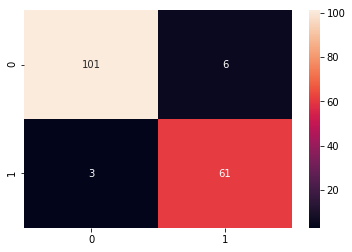

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.91      0.95      0.93        64

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [51]:
clf_rf = RandomForestClassifier(random_state=124)

params_dict_rf = {
    "n_estimators": [x for x in range(100, 2000, 100)],
    "criterion": ["gini", "entropy"],
    "max_depth": [x for x in range(10, 100, 10)] + [None],
    "max_features": ['auto', 'sqrt'],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1,4),
    "bootstrap": [True, False]
}

clf_rf_cv = RandomizedSearchCV(clf_rf, params_dict_rf, random_state=1, n_iter=200, cv=5, verbose=2, n_jobs=-1)
best_clf_rf = get_best_clf(clf_rf_cv, params_dict_rf, X_train, y_train)
rf_imp_time, rf_imp_acc = evaluate(best_clf_rf, X_test, y_test)

The accuracy is 94.7%. Which is a bit higher than previous Random Forest Classifiers with `PCA()`. But still it doesn't outperform best linear classifiers.

This is the final comparison table of all our trained classifiers

| Classifier | Test accuracy | Time to predict 171 sample|
|-|-|-|
| LR + PCA(2) | 94.15% | 1.0 ms |
| SVM + PCA(2) | 94.15% | 1.0 ms |
| RF + PCA(2) | 90.06% | 62.83 ms |
| LR + PCA(0.9) | 91.81% | 1.0 ms |
| SVM + PCA(0.9) | 94.74% | 1.0 ms |
| RF + PCA(0.9) | 90.06% | 55.85 ms |
| LR | 94.74% | 1.0 ms |
| SVM | 96.49% | 1.0 ms |
| RF | 94.74% | 56.87 ms |

## A few of the other things we could have tried, time permitting:

 - Apply other feature selection techniques, like Recursive Feature Elimination (RFE)
 - More hyperparameter exploration, larger grids, apply Hyperopt
 - Examine hyperparameter optimization for PCA()
 - Shallow Neural Networks